In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
df.shape

(50000, 2)

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#  data visualization

In [5]:
from warnings import filterwarnings
filterwarnings("ignore")

<Axes: xlabel='sentiment', ylabel='count'>

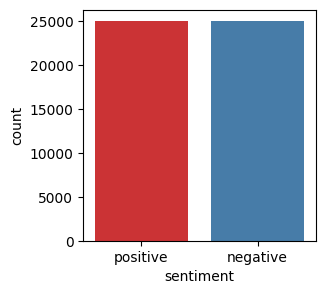

In [6]:
import seaborn as sns

colors = sns.color_palette("Set1", 3)

import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
sns.countplot(x= "sentiment", data= df,palette=colors)

In [7]:
# object initialization
positive_review = list(df[df["sentiment"]=="positive"]["review"])
negative_review= list(df[df["sentiment"]== "negative"]["review"])

In [8]:
#positive_review_series = pd.Series(positive_review)
#counts = positive_review_series.value_counts()

# visualize word importance with word cloud

In [9]:
from wordcloud import WordCloud , STOPWORDS

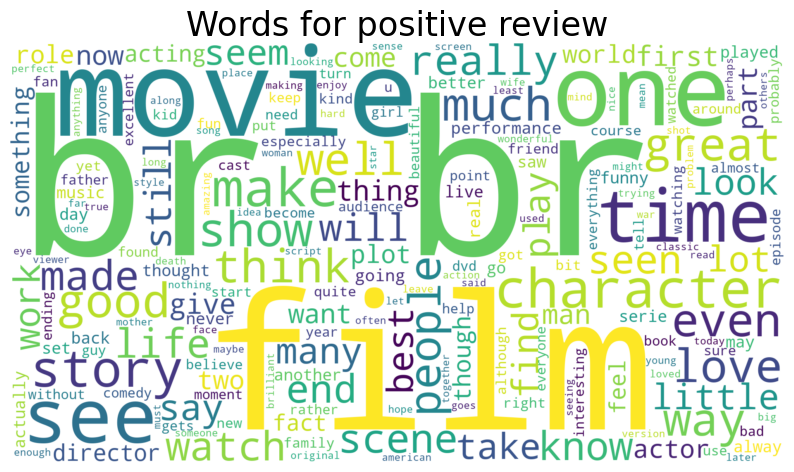

In [10]:
def create_cloud(string, title=None):
    cloud = WordCloud(height = 1080,
                     width = 2000,
                     background_color="white",
                     min_font_size=12,
                     stopwords= STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud, interpolation= "bilinear")
    plt.axis("off")
    if title:
        plt.title(title, fontdict={"fontsize":24})
    plt.show()
create_cloud(" ".join(positive_review).lower(), "Words for positive review")

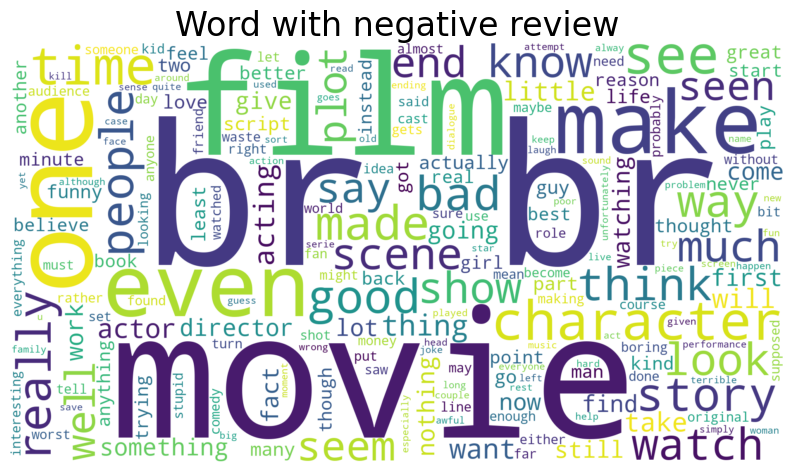

In [11]:
create_cloud(" ".join(negative_review).lower(),"Word with negative review")

# data cleaning

In [12]:
def text_processing(data,review):
    digit = '1234567890'
    from bs4 import BeautifulSoup
    import re
    def decontracted(phrase):
        # specific
        phrase= re.sub(r'<br /><br />',' ',phrase)
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase
    stopwords=set(STOPWORDS)

    # Combining all the above stundents 
    from tqdm import tqdm
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data[review].values):
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = sentance.lower()
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords )
        preprocessed_reviews.append(sentance.strip()) # remove space, tab or new lines
    
    new_preprocessed_reviews=[]
    for sentennce in preprocessed_reviews:
        for char in sentennce:
            if char in digit:
                sentennce = sentennce.replace(char,'')
        new_preprocessed_reviews.append(sentennce)
        
                
    
    
    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list2=[]
    for  sentence in new_preprocessed_reviews:
      list1=[]
      for words in sentence.split():
            list1.append(porter.stem(words))

      list2.append(' '.join(list1))
    return(list2)

df.columns

In [13]:
df['cleaned_review']=text_processing(df,'review')

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:19<00:00, 2510.84it/s]


In [14]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod will hooked...
1,A wonderful little production. <br /><br />The...,positive,wonder littl production. film techniqu unassum...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy (jake) think zombi clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.sentiment = le.fit_transform(df.sentiment)

In [16]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,1,one review mention watch oz episod will hooked...
1,A wonderful little production. <br /><br />The...,1,wonder littl production. film techniqu unassum...
2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,basic famili littl boy (jake) think zombi clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...


In [17]:
df_x = df["cleaned_review"]
df_y = df["sentiment"]

# data spliting

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(df_x,df_y, test_size= .20, random_state= 42)

In [19]:
xtrain.shape,xtest.shape, ytrain.shape,ytest.shape

((40000,), (10000,), (40000,), (10000,))

In [20]:
ytrain.value_counts()

sentiment
0    20039
1    19961
Name: count, dtype: int64

In [21]:
xtrain

39087    kept ask mani fights, scream matches, swear ge...
30893    watch entir movie. watch entir movie. stop dvd...
45278    touch love stori reminisc in mood love'. draw...
16398    latter-day fulci schlocker total abysm concoct...
13653    first all, firmli believ norwegian movi contin...
                               ...                        
11284    `shadow magic' recaptur joy amaz first movi au...
44732    found movi quit enjoy fairli entertaining. goo...
38158    avoid one! terribl movie. exciting? pointless ...
860      product quit surpris me. absolut love obscur e...
15795    decent movie. although littl bit short time me...
Name: cleaned_review, Length: 40000, dtype: object

# data preporcessing using vectorizer

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer(max_features=50, ngram_range=(1,2))
x_train= vectorizer.fit_transform(xtrain)
x_test= vectorizer.transform(xtest) 

In [23]:
x_train.shape, x_test.shape

((40000, 50), (10000, 50))

In [24]:
x_train.toarray()[0].shape

(50,)

# model building

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

In [26]:
accuracy_train_list = []
accuracy_test_list = []
f1_train_list =[]
f1_test_list=[]
for i in range(3,40):
    
    print('K',i)
    
    # initialization
    neigh = KNeighborsClassifier(n_neighbors=i)
    
    # Training
    neigh.fit(x_train, ytrain)
    
    # Test the training data
    y_pred_train = neigh.predict(x_train)
    accuracy_train = accuracy_score(y_pred_train,ytrain)
    accuracy_train_list.append(accuracy_train)
    f1_train = f1_score(y_pred_train,ytrain)
    f1_train_list.append(f1_train)
    
    

    # Test the test data
    y_pred_test = neigh.predict(x_test)
    accuracy_test = accuracy_score(y_pred_test,ytest)
    accuracy_test_list.append(accuracy_test)
    f1_test = f1_score(y_pred_test,ytest)
    f1_test_list.append(f1_test)

   
    print(accuracy_train,accuracy_test)
    print(f1_train,f1_test)
    print()

K 3
0.8094 0.6366
0.8109314552127765 0.6451171875

K 4
0.769475 0.6355
0.7379131967143222 0.5869688385269122

K 5
0.76775 0.654
0.7708775218270606 0.662109375

K 6
0.75045 0.6537
0.7263556116015133 0.623546037612784

K 7
0.748375 0.6561
0.7520752764982634 0.664520534581992

K 8
0.7391 0.6561
0.7205890227576974 0.6337203110022367

K 9
0.739175 0.6651
0.743629438505959 0.674316833608869

K 10
0.731225 0.6671
0.7155744860975158 0.6516689337658261

K 11
0.730575 0.6664
0.7354493458035692 0.6758647493198601

K 12
0.726325 0.6703
0.7136317262667748 0.6584481508339376

K 13
0.725725 0.6755
0.7306341918534704 0.6840003895218619

K 14
0.72295 0.676
0.7123501012303379 0.666323377960865

K 15
0.722375 0.6782
0.7274913499055238 0.6860487804878049

K 16
0.718575 0.6776
0.7094292868020959 0.6698074559606718

K 17
0.719325 0.6792
0.7243081305404808 0.6887854093907645

K 18
0.71725 0.6805
0.7090450710022639 0.6759306217669134

K 19
0.718325 0.6811
0.7239089416550271 0.6901175784666214

K 20
0.716025 0

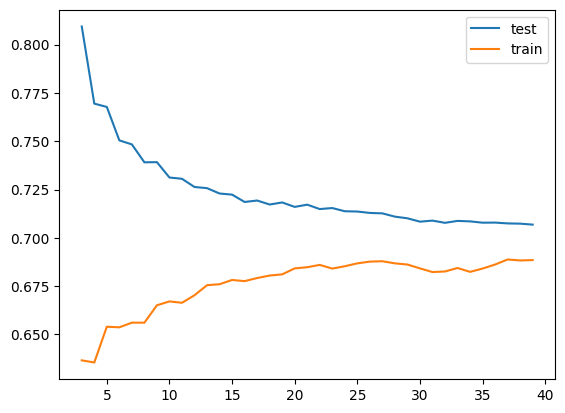

In [27]:
plt.plot(list(range(3,40)),accuracy_train_list)
plt.plot(list(range(3,40)),accuracy_test_list)
plt.legend(['test','train'])
plt.show()

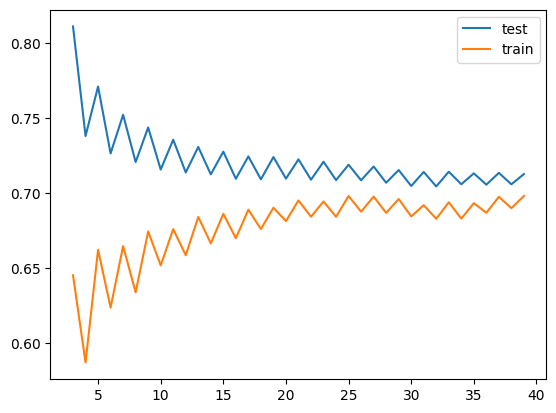

In [28]:
plt.plot(list(range(3,40)),f1_train_list)
plt.plot(list(range(3,40)),f1_test_list)
plt.legend(['test','train'])
plt.show()

In [29]:
from sklearn.metrics import classification_report
target_names = ['Postive', 'Negative']
# print(classification_report(y_pred_test, y_test, target_names=target_names))
print(classification_report(y_pred_test, ytest, target_names=target_names))

              precision    recall  f1-score   support

     Postive       0.66      0.70      0.68      4724
    Negative       0.71      0.68      0.70      5276

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [30]:
from sklearn.metrics import confusion_matrix
c= confusion_matrix(y_pred_test, ytest)
c

array([[3285, 1439],
       [1676, 3600]], dtype=int64)

<Axes: >

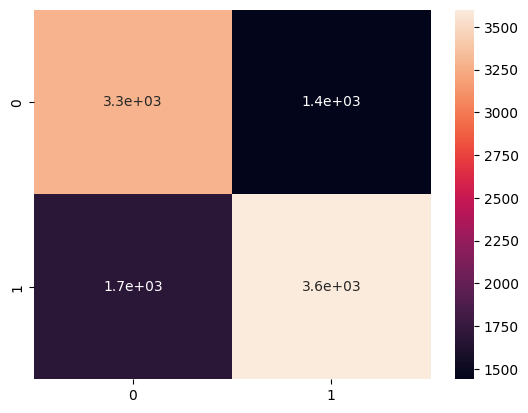

In [31]:
import seaborn as sns
sns.heatmap(c, annot=True)

In [32]:
neigh = KNeighborsClassifier(n_neighbors=39)
    
    # Training
neigh.fit(x_train, ytrain)
    
    # Test the training data
y_pred_train = neigh.predict(x_train)
accuracy_train = accuracy_score(y_pred_train,ytrain)
accuracy_train_list.append(accuracy_train)
f1_train = f1_score(y_pred_train,ytrain)
f1_train_list.append(f1_train)
    
    

    # Test the test data
y_pred_test = neigh.predict(x_test)
accuracy_test = accuracy_score(y_pred_test,ytest)
accuracy_test_list.append(accuracy_test)
f1_test = f1_score(y_pred_test,ytest)
f1_test_list.append(f1_test)

   
print(accuracy_train,accuracy_test)
print(f1_train,f1_test)
print()

0.70685 0.6885
0.7125557680050988 0.6980126030053321



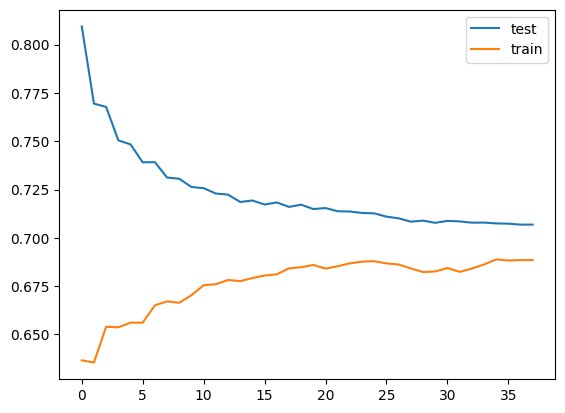

In [33]:
plt.plot(accuracy_train_list)
plt.plot(accuracy_test_list)
plt.legend(['test','train'])
plt.show()

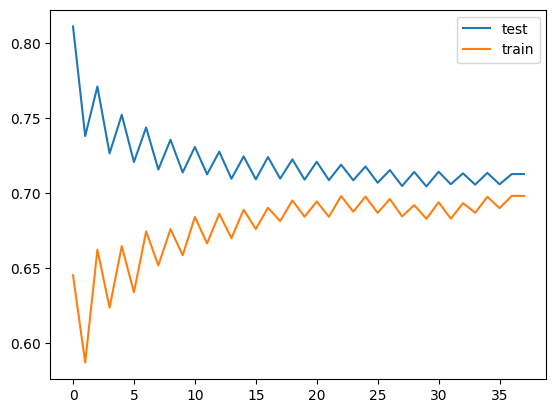

In [34]:
plt.plot(f1_train_list)
plt.plot(f1_test_list)
plt.legend(['test','train'])
plt.show()

In [35]:
from sklearn.metrics import classification_report
target_names = ['Postive', 'Negative']
# print(classification_report(y_pred_test, y_test, target_names=target_names))
print(classification_report(y_pred_test, ytest, target_names=target_names))

              precision    recall  f1-score   support

     Postive       0.66      0.70      0.68      4724
    Negative       0.71      0.68      0.70      5276

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [36]:
from sklearn.metrics import confusion_matrix
c= confusion_matrix(y_pred_test, ytest)
c

array([[3285, 1439],
       [1676, 3600]], dtype=int64)

<Axes: >

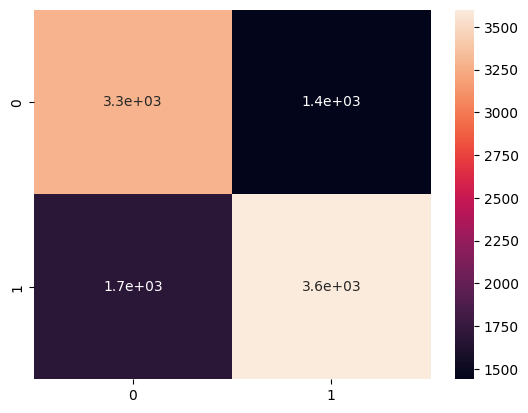

In [37]:
import seaborn as sns
sns.heatmap(c, annot=True)

# IMBD with customised Dataset